In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Options d'affichage
pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")


In [2]:
# Charger le fichier CSV (assure-toi qu'il est bien dans le dossier data/)
data_path = "Dataa.csv"

if not os.path.exists(data_path):
    raise FileNotFoundError(f"Le fichier {data_path} est introuvable.")

data = pd.read_csv(data_path)
print(f" Données chargées : {data.shape[0]} lignes et {data.shape[1]} colonnes.")
data.head()


 Données chargées : 1000 lignes et 9 colonnes.


,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [3]:
# Aperçu global
data.info()

# Vérifier les valeurs manquantes
print("\nValeurs manquantes :")
print(data.isna().sum())

# Statistiques descriptives
data.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB

Valeurs manquantes :
Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs  

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,970,970,970,1000,1000.000000,970.000000,1000.000000
unique,NaN,NaN,5,3,4,3,NaN,NaN,NaN
top,NaN,NaN,Clear,Medium,Morning,Bike,NaN,NaN,NaN
freq,NaN,NaN,470,390,308,503,NaN,NaN,NaN
mean,500.500000,10.059970,NaN,NaN,NaN,NaN,16.982000,4.579381,56.732000
std,288.819436,5.696656,NaN,NaN,NaN,NaN,7.204553,2.914394,22.070915
min,1.000000,0.590000,NaN,NaN,NaN,NaN,5.000000,0.000000,8.000000
25%,250.750000,5.105000,NaN,NaN,NaN,NaN,11.000000,2.000000,41.000000
50%,500.500000,10.190000,NaN,NaN,NaN,NaN,17.000000,5.000000,55.500000
75%,750.250000,15.017500,NaN,NaN,NaN,NaN,23.000000,7.000000,71.000000


In [4]:
# Gérer les valeurs manquantes
# Pour les colonnes numériques, on remplace par la moyenne
for col in ['Courier_Experience_yrs']:
    if col in data.columns and data[col].isnull().any():
        mean_val = data[col].mean()
        data[col] = data[col].fillna(mean_val)
        print(f"Valeurs manquantes dans '{col}' remplacées par la moyenne : {mean_val:.2f}")

# Pour les colonnes catégorielles, on remplace par le mode
for col in ['Weather', 'Traffic_Level', 'Time_of_Day']:
    if col in data.columns and data[col].isnull().any():
        mode_val = data[col].mode()[0]
        data[col] = data[col].fillna(mode_val)
        print(f"Valeurs manquantes dans '{col}' remplacées par le mode : {mode_val}")

# Vérifier à nouveau les valeurs manquantes
print("\nNouvelles valeurs manquantes :")
print(data.isna().sum())

Valeurs manquantes dans 'Courier_Experience_yrs' remplacées par la moyenne : 4.58
Valeurs manquantes dans 'Weather' remplacées par le mode : Clear
Valeurs manquantes dans 'Traffic_Level' remplacées par le mode : Medium
Valeurs manquantes dans 'Time_of_Day' remplacées par le mode : Morning

Nouvelles valeurs manquantes :
Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64


In [5]:
#Vérification des colonnes, Définis la variable cible
print("Colonnes disponibles :", list(data.columns))
target = "Delivery_Time_min"
print(f" Variable cible définie : {target}")


Colonnes disponibles : ['Order_ID', 'Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Delivery_Time_min']
 Variable cible définie : Delivery_Time_min


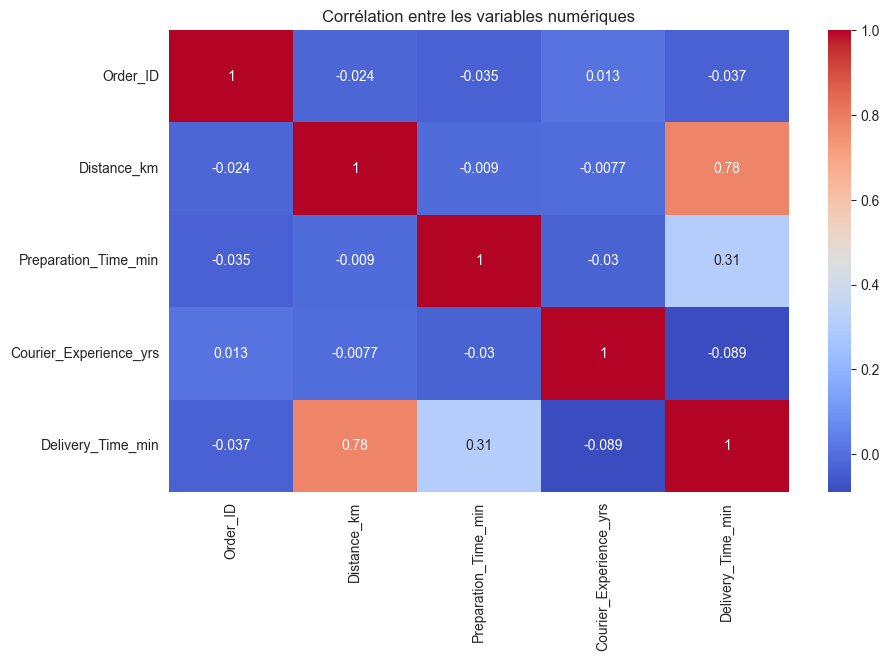

In [6]:
# Heatmap des corrélations (variables numériques)
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Corrélation entre les variables numériques")
plt.show()


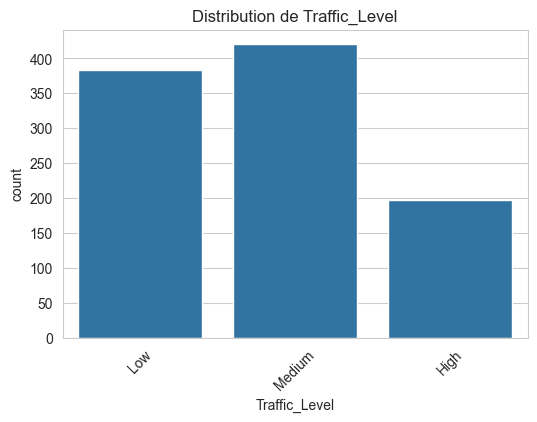

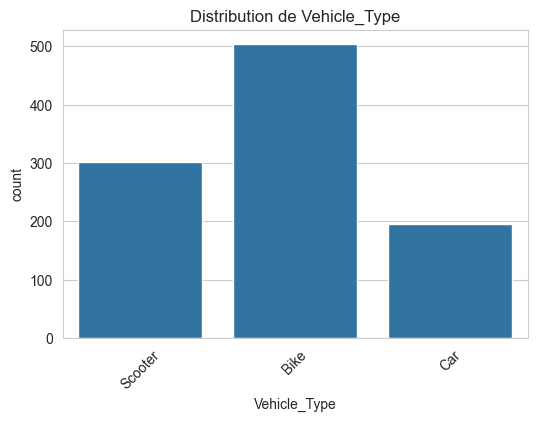

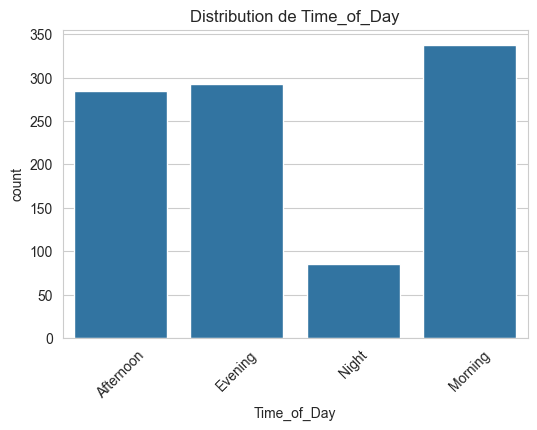

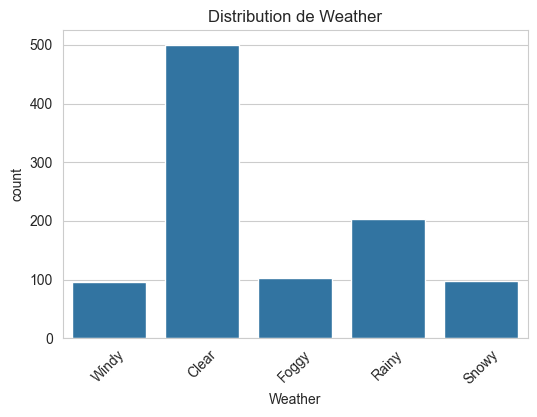

In [7]:
#Countplots (variables catégorielles)
categorical_features = ["Traffic_Level", "Vehicle_Type", "Time_of_Day", "Weather"]

for feature in categorical_features:
    if feature in data.columns:
        plt.figure(figsize=(6,4))
        sns.countplot(x=feature, data=data)
        plt.title(f"Distribution de {feature}")
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"La colonne '{feature}' est absente du DataFrame.")


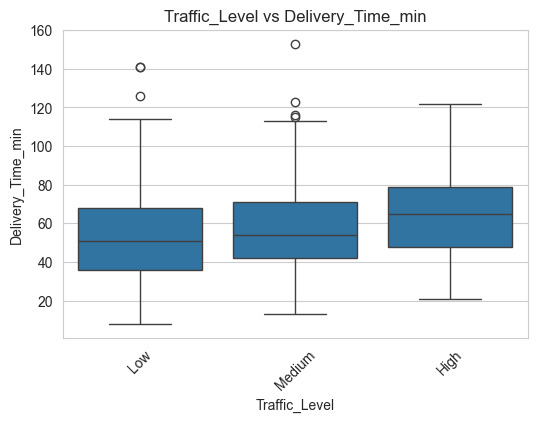

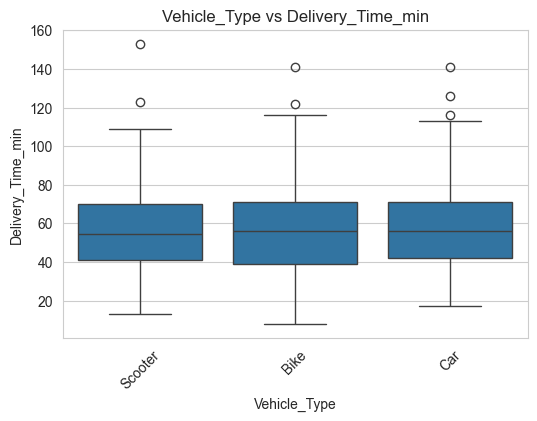

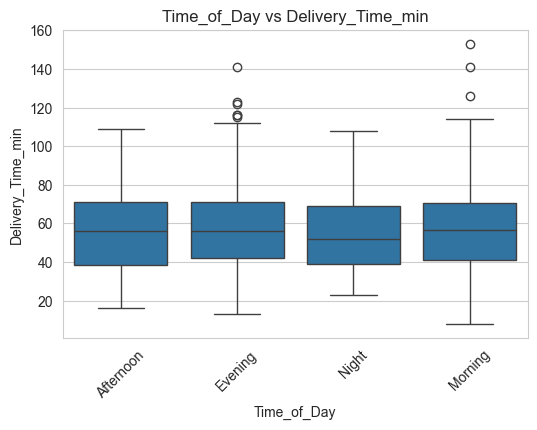

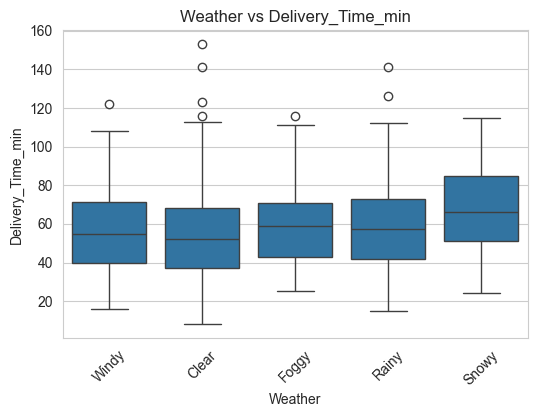

In [8]:
#Boxplots (relation entre catégorie et temps de livraison)
for feature in categorical_features:
    if feature in data.columns and target in data.columns:
        plt.figure(figsize=(6,4))
        sns.boxplot(x=feature, y=target, data=data)
        plt.title(f"{feature} vs {target}")
        plt.xticks(rotation=45)
        plt.show()


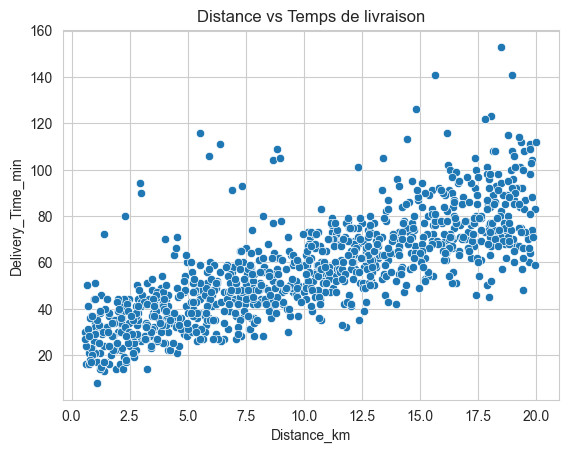

In [9]:
#Analyse rapide
# Exemple : corrélation simple entre Distance et temps de livraison
if "Distance_km" in data.columns and target in data.columns:
    sns.scatterplot(x="Distance_km", y=target, data=data)
    plt.title("Distance vs Temps de livraison")
    plt.show()


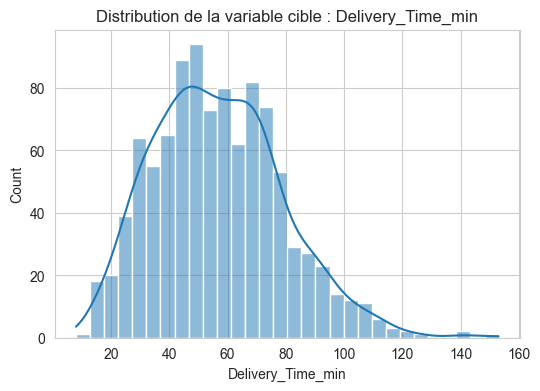

In [10]:
#Distribution de la variable cible
plt.figure(figsize=(6,4))
sns.histplot(data[target], kde=True, bins=30)
plt.title(f"Distribution de la variable cible : {target}")
plt.xlabel(target)
plt.show()


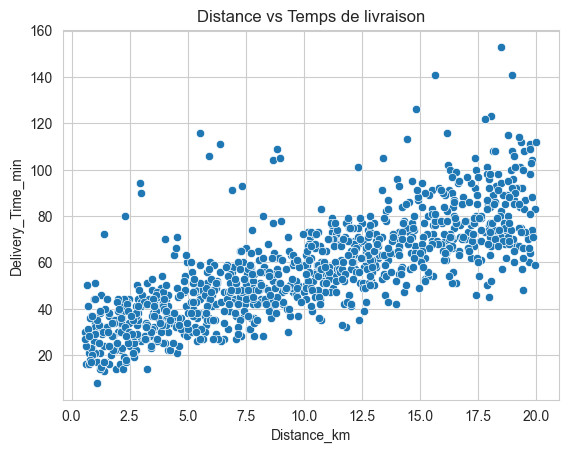

In [11]:
#Relation distance / temps de livraison
if "Distance_km" in data.columns and target in data.columns:
    sns.scatterplot(x="Distance_km", y=target, data=data)
    plt.title("Distance vs Temps de livraison")
    plt.show()


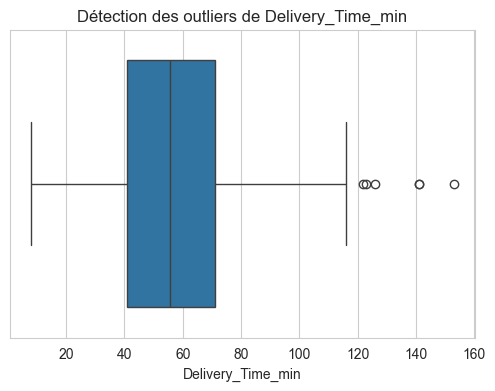

In [12]:
#Détection d’outliers (valeurs extrêmes)
plt.figure(figsize=(6,4))
sns.boxplot(x=data[target])
plt.title(f"Détection des outliers de {target}")
plt.show()


Prétraitement (StandardScaler pour numérique, OneHotEncoder pour catégoriel)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression


df = pd.read_csv("Dataa.csv") 

# Handle missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)  # categorical
    else:
        df[col].fillna(df[col].mean(), inplace=True)     # numerical




ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# Detect and remove outliers (IQR method)
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# Encode categorical variables
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])





In [ ]:
# Quick EDA visuals
# Boxplots for numerical columns
for col in num_cols:
    plt.figure()
    plt.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Histogram of numerical columns
df[num_cols].hist(bins=15, figsize=(15,8))
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()



In [ ]:
# Feature selection (SelectKBest + f_regression)
# Replace 'target' with your target column name
target_col = 'Delivery_Time_min'
X = df.drop(target_col, axis=1)
y = df[target_col]

# Select top 5 features
selector = SelectKBest(score_func=f_regression, k=4)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features:", list(selected_features))

print("Preprocessing, EDA, and feature selection completed!")

this is the Modélisation + GridSearchCV + and pipeline

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 1. Définir X et y + Split
target_col = "Delivery_Time_min"   
X = df[selected_features]
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

# 2. RandomForestRegressor + GridSearch 
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('model', RandomForestRegressor(random_state=42))
])

rf_param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5],
}

rf_grid = GridSearchCV(
    rf_pipeline,
    param_grid=rf_param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)
rf_grid.fit(X_train, y_train)

print("\n=== Random Forest Best Params ===")
print(rf_grid.best_params_)

rf_best_model = rf_grid.best_estimator_
rf_pred = rf_best_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest MAE: {rf_mae:.2f}")
print(f"Random Forest R²: {rf_r2:.3f}")


# === 3. SVR + GridSearch ===
svr_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # SVR a besoin de scaling
    ('model', SVR())
])

svr_param_grid = {
    'model__kernel': ['rbf', 'linear'],
    'model__C': [0.1, 1, 10],
    'model__epsilon': [0.1, 0.5, 1]
}

svr_grid = GridSearchCV(
    svr_pipeline,
    param_grid=svr_param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)
svr_grid.fit(X_train, y_train)

print("\n=== SVR Best Params ===")
print(svr_grid.best_params_)

svr_best_model = svr_grid.best_estimator_
svr_pred = svr_best_model.predict(X_test)

svr_mae = mean_absolute_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)

print(f"SVR MAE: {svr_mae:.2f}")
print(f"SVR R²: {svr_r2:.3f}")


# === 4. Choix du meilleur modèle ===
if rf_mae < svr_mae:
    print("\n Le meilleur modèle est: RandomForestRegressor")
    best_model = rf_best_model
    best_mae = rf_mae
    best_r2 = rf_r2
else:
    print("\n Le meilleur modèle est: SVR")
    best_model = svr_best_model
    best_mae = svr_mae
    best_r2 = svr_r2

print(f"\nMeilleur MAE: {best_mae:.2f}")
print(f"Meilleur R²: {best_r2:.3f}")


Train set: (795, 4), Test set: (199, 4)
Fitting 5 folds for each of 12 candidates, totalling 60 fits

=== Random Forest Best Params ===
{'model__max_depth': None, 'model__min_samples_split': 5, 'model__n_estimators': 100}
Random Forest MAE: 6.50
Random Forest R²: 0.810
Fitting 5 folds for each of 18 candidates, totalling 90 fits

=== SVR Best Params ===
{'model__C': 10, 'model__epsilon': 0.1, 'model__kernel': 'rbf'}
SVR MAE: 6.18
SVR R²: 0.817

👉 Le meilleur modèle est: SVR

Meilleur MAE: 6.18
Meilleur R²: 0.817
